In [130]:
import numpy as np
import matplotlib.pyplot as plt


data_low_temps = [60,100,150,200,250,300,350,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000,7000]
data_low =  np.genfromtxt('CIA_Borysow_H2H2_0060-7000K_0.61-500um.dat')

data_high_temps = [1000,2000,3000,4000,5000,6000,7000]
data_high =  np.genfromtxt('CIA_H2H2_1000-7000K.dat')

In [131]:
data_low[0]

array([2.000e+01, 3.878e-08, 3.703e-08, 2.681e-08, 2.016e-08, 1.599e-08,
       1.321e-08, 1.125e-08, 9.661e-09, 7.795e-09, 6.614e-09, 5.815e-09,
       5.252e-09, 4.841e-09, 4.538e-09, 3.213e-09, 2.839e-09, 2.917e-09,
       3.194e-09, 3.515e-09, 3.867e-09])

In [132]:
data_high[0]

array([2.000e+01, 4.675e-09, 3.213e-09, 2.839e-09, 2.917e-09, 3.194e-09,
       3.515e-09, 3.867e-09])

In [133]:
np.shape(data_high)

(1000, 8)

In [134]:
np.shape(data_low)

(824, 21)

In [135]:
data_combined = np.zeros([np.shape(data_high)[0],np.shape(data_low)[1]])

In [136]:
data_combined[:np.shape(data_low)[0]] = data_low[:]
data_combined[np.shape(data_low)[0]:,-np.shape(data_high)[1]+1:] = data_high[np.shape(data_low)[0]:,1:]
data_combined[:,0] = data_high[:,0]

/Users/markhammond/miniconda2/envs/ps-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


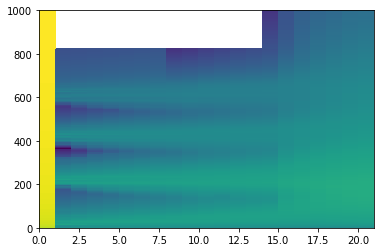

In [137]:
plt.pcolor(np.log10(data_combined))

In [165]:
file1 = open("H2-H2_CIA_Borysow_combined.cia","w") 

# generate HITRAN header




 

# Conversion from amagat units from "New section of the HITRAN database: Collision-induced absorption (CIA)"
for i in range(int(np.shape(data_combined[0])[0]-1)):
#    file1.write("               H2-H2    %.3f %.3f   %d  %.1f %1.3e -.999                             6\n" % (np.min(data_combined[:,0]),np.max(data_combined[:,0]),len(data_combined),data_low_temps[i],1.385e-39*np.max(data_combined[:,1:]))) 
    header = ""
    header+="{:>20}".format("H2-H2")
    header+="{:>10}".format("%.3f" %(np.min(data_combined[:,0])))
    header+="{:>10}".format("%.3f" %(np.max(data_combined[:,0])))
    header+="{:>7}".format("%.d" %(len(data_combined)))
    header+="{:>7}".format("%.1f" %(data_low_temps[i]))
    header+="{:>10}".format("%1.3e" %(1.385e-39*np.max(data_combined[:,1:])))
    header+=" -.999                             6\n"
    file1.write(header)
    for j in range(int(np.shape(data_combined[:,0])[0])):
        line = ""
        line += "{:>10}".format("%.4f" %(data_combined[j,0]))
        line += "{:>11}".format("%1.3e" %(1.385e-39*data_combined[j,i+1]))
        file1.write(line)

        #file1.write("   %.4f   %1.3e" %(data_combined[j,0],1.385e-39*data_combined[j,i+1]))
        file1.write('\n')



file1.close() 


In [139]:
len(data_combined)

1000

In [161]:
len(header)

100

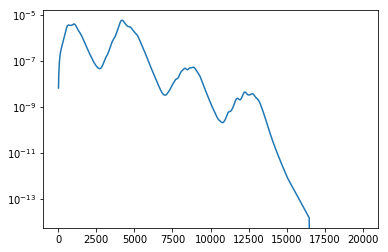

In [170]:
plt.semilogy(data_combined[:,0],data_combined[:,10])